# Servicios de Interconnect
Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

## Interconnect proporciona principalmente dos tipos de servicios:

Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
Internet. La red se puede configurar a través de una línea telefónica (DSL, línea de abonado digital) o a través de un cable de fibra óptica.
Algunos otros servicios que ofrece la empresa incluyen:

Seguridad en Internet: software antivirus (ProtecciónDeDispositivo) y un bloqueador de sitios web maliciosos (SeguridadEnLínea).
Una línea de soporte técnico (SoporteTécnico).
Almacenamiento de archivos en la nube y backup de datos (BackupOnline).
Streaming de TV (StreamingTV) y directorio de películas (StreamingPelículas)
La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

## Descripción de los datos
Los datos consisten en archivos obtenidos de diferentes fuentes:

* contract.csv — información del contrato;
* personal.csv — datos personales del cliente;
* internet.csv — información sobre los servicios de Internet;
* phone.csv — información sobre los servicios telefónicos.

En cada archivo, la columna customerID (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

## Paso 1

In [1]:
## Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [2]:
## Cargar y revisión inicial de los datos
contract_df = pd.read_csv('contract.csv')
personal_df = pd.read_csv('personal.csv')
internet_df = pd.read_csv('internet.csv')
phone_df = pd.read_csv('phone.csv')


In [3]:
# Verificar dimensiones, tipos de variables y primeras filas en cada dataset.
# Información del contrato
contract_df.info()
contract_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
#Datos personales del cliente
personal_df.info()
personal_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
#Información sobre los servicios de Internet
internet_df.info()
internet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [6]:
# Información sobre los servicios telefónicos
phone_df.info()
phone_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


## 2. Limpieza y preparación básica de los datos

In [7]:
# Unificar los datasets usando 'customerID' como clave
df_merged = contract_df.merge(personal_df, on='customerID', how='left') \
                       .merge(internet_df, on='customerID', how='left') \
                       .merge(phone_df, on='customerID', how='left')
df_merged.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [8]:
## Contar valores nulos
df_merged.isnull().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [9]:
df_merged.isnull().sum().sum()  # Total de valores nulos

11364

In [10]:
df_merged['EndDate'].describe()


count     7043
unique       5
top         No
freq      5174
Name: EndDate, dtype: object

In [11]:
cols_to_fill_no = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

df_merged[cols_to_fill_no] = df_merged[cols_to_fill_no].fillna('No')

df_merged.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

In [12]:
df_merged['churn'] = contract_df['EndDate'].apply(lambda x: 0 if x.strip() == 'No' else 1)
df_merged[['customerID', 'EndDate', 'churn']].head()

,customerID,EndDate,churn
0,7590-VHVEG,No,0
1,5575-GNVDE,No,0
2,3668-QPYBK,2019-12-01 00:00:00,1
3,7795-CFOCW,No,0
4,9237-HQITU,2019-11-01 00:00:00,1


In [13]:
df_merged['BeginDate'] = pd.to_datetime(df_merged['BeginDate'], errors='coerce')
df_merged['EndDate'] = df_merged['EndDate'].replace('No', pd.NaT)  # reemplazar 'No' por NaT
df_merged['EndDate'] = pd.to_datetime(df_merged['EndDate'], errors='coerce')

# Definir fecha límite como la fecha máxima en EndDate
fecha_limite = df_merged['EndDate'].max()

# Rellenar los valores NaT de EndDate con la fecha límite
df_merged['EndDate_filled'] = df_merged['EndDate'].fillna(fecha_limite)

# Calcular tenure en días (puedes dividir por 30 para meses si prefieres)
df_merged['tenure'] = (df_merged['EndDate_filled'] - df_merged['BeginDate']).dt.days
df_merged['tenure'] = df_merged['tenure'] / 30

In [14]:


# Seleccionar columnas categóricas para one-hot encoding (excluyendo fechas, id y columnas numéricas)
categorical_cols = df_merged.select_dtypes(include='object').columns.difference(['customerID', 'churn'])

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df_merged, columns=categorical_cols, drop_first=True)

In [15]:
cols_to_drop = ['BeginDate', 'EndDate', 'EndDate_filled']
df_encoded = df_encoded.drop(columns=cols_to_drop)

In [16]:
print(df_encoded.columns.tolist())

['customerID', 'MonthlyCharges', 'SeniorCitizen', 'churn', 'tenure', 'Dependents_Yes', 'DeviceProtection_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineSecurity_Yes', 'PaperlessBilling_Yes', 'Partner_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'StreamingMovies_Yes', 'StreamingTV_Yes', 'TechSupport_Yes', 'TotalCharges_100.2', 'TotalCharges_100.25', 'TotalCharges_100.35', 'TotalCharges_100.4', 'TotalCharges_100.8', 'TotalCharges_100.9', 'TotalCharges_1001.2', 'TotalCharges_1001.5', 'TotalCharges_1003.05', 'TotalCharges_1004.35', 'TotalCharges_1004.5', 'TotalCharges_1004.75', 'TotalCharges_1005.7', 'TotalCharges_1006.9', 'TotalCharges_1007.8', 'TotalCharges_1007.9', 'TotalCharges_1008.55', 'TotalCharges_1008.7', 'TotalCharges_1009.25', 'TotalCharges_101.1', 'TotalCharges_101.45', 'TotalCharges_101.65', 'TotalCharges_101.9', 'TotalCharges_1010', 'TotalCharges_1011.

## Paso 3 Análisis exploratorio y visualización (EDA)

In [17]:
# Calcular la proporción de clientes que cancelaron vs. los que permanecen
churn_counts = df_encoded['churn'].value_counts(normalize=True)*100
print("Proporción de clientes que permanecen (0) y que cancelaron (1):")
print(churn_counts)

Proporción de clientes que permanecen (0) y que cancelaron (1):
churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


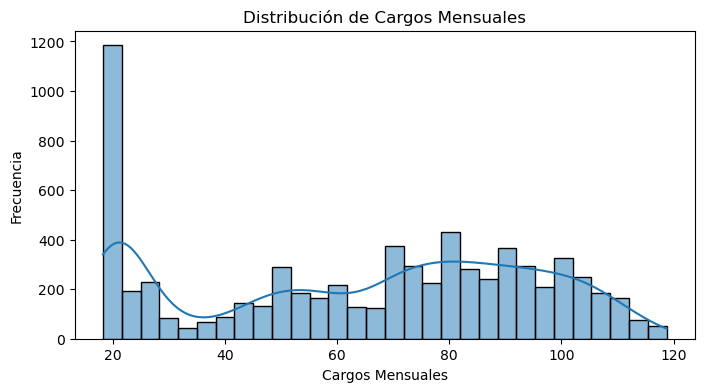

In [18]:
# Histograma de cargos mensuales
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribución de Cargos Mensuales')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Frecuencia')
plt.show()


Interpretación: La mayoría de los clientes pagan cargos mensuales bajos, cerca de 20 dólares, pero también hay grupos significativos con cargos más altos. Esto refleja diferentes planes o niveles de servicio.

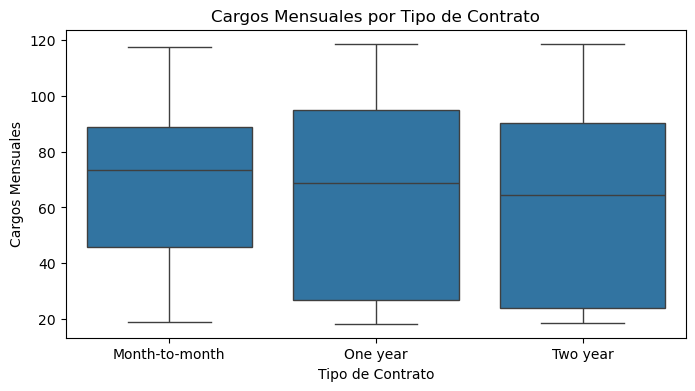

In [19]:
# Diagrama de caja para cargos mensuales por tipo de contrato
plt.figure(figsize=(8, 4))
sns.boxplot(x='Type', y='MonthlyCharges', data=df_merged)
plt.title('Cargos Mensuales por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cargos Mensuales')
plt.show()

Interpretación: Los cargos mensuales tienden a ser más altos en contratos mes a mes, mientras que en contratos de uno o dos años los cargos suelen ser menores y más variables. Esto puede reflejar descuentos o beneficios por compromisos a largo plazo.

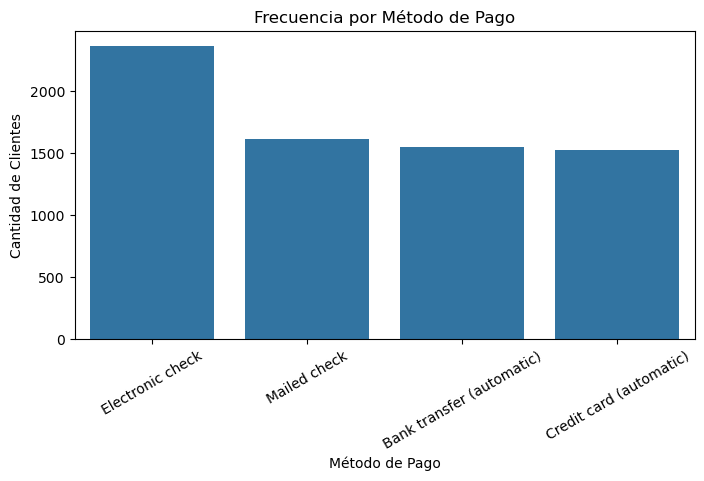

In [20]:
# Gráfico de barras para método de pago
plt.figure(figsize=(8, 4))
sns.countplot(x='PaymentMethod', data=df_merged, order=df_merged['PaymentMethod'].value_counts().index)
plt.title('Frecuencia por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=30)
plt.show()

Interpretación: La mayoría de los clientes prefieren pagar con cheques electrónicos, seguido por cheques enviados por correo, transferencias bancarias automáticas y tarjetas de crédito automáticas. Esto puede ayudar a enfocar promociones o mejoras en los métodos de pago más usados.

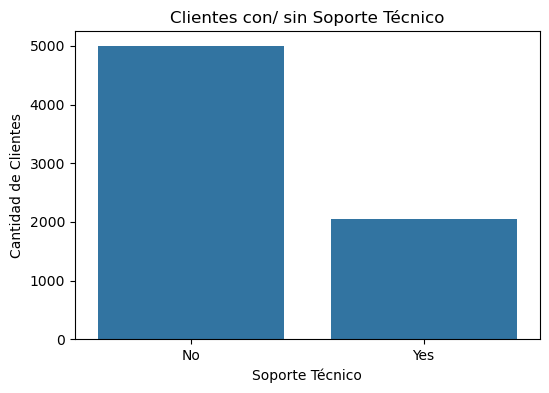

In [21]:
# Gráfico de barras para servicios adicionales (ejemplo: TechSupport)
plt.figure(figsize=(6, 4))
sns.countplot(x='TechSupport', data=df_merged)
plt.title('Clientes con/ sin Soporte Técnico')
plt.xlabel('Soporte Técnico')
plt.ylabel('Cantidad de Clientes')
plt.show()

Interpretación: La mayoría de los clientes no utilizan soporte técnico, lo que podría indicar una oportunidad para mejorar la atención y así aumentar la satisfacción y retención de clientes.

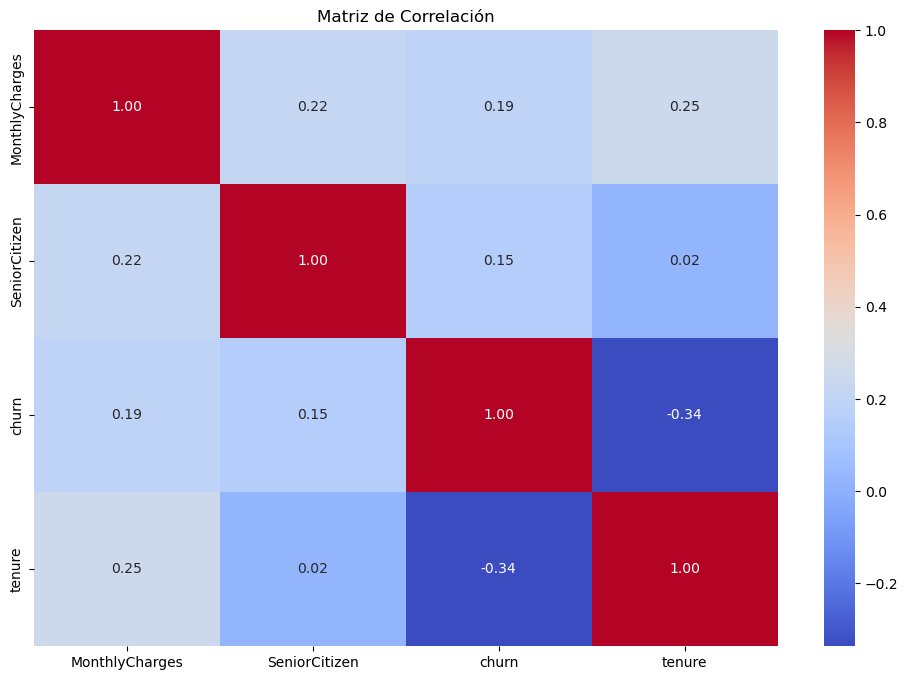

In [22]:
## Revisar correlaciones entre variables numéricas y la variable objetivo: 'Churn'
numeric_cols = df_merged.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Interpretación: a correlación muestra que los clientes con mayor tiempo en la compañía (tenure) tienden a cancelar menos. También se observa que cargos mensuales altos (MonthlyCharges) están relacionados con una mayor cancelación. Esto indica que los clientes que pagan más o llevan menos tiempo son más propensos a cancelar.

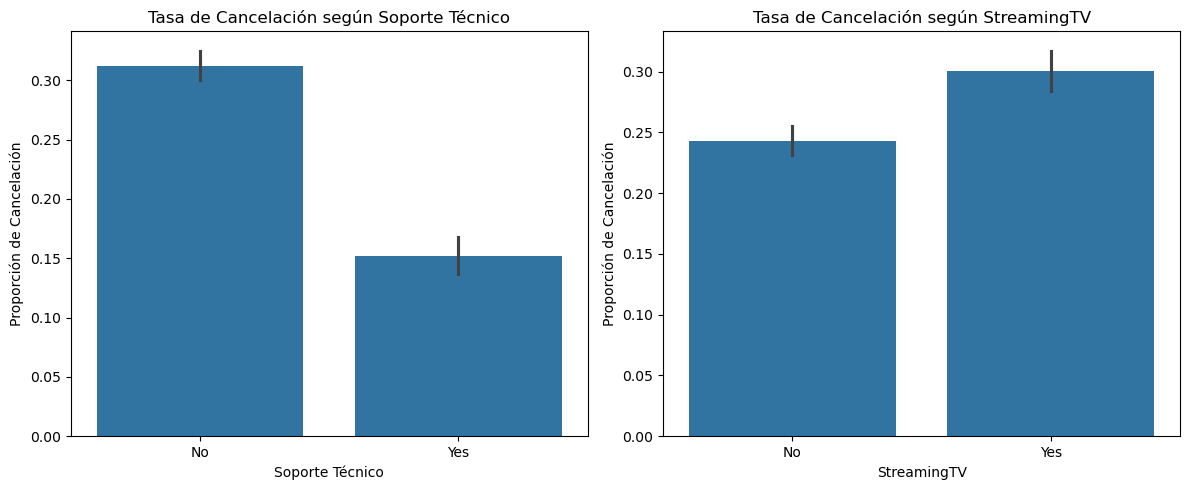

In [23]:
# Visualizar la tasa de cancelación según SoporteTécnico y StreamingTV
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Soporte Técnico
sns.barplot(
    x='TechSupport',
    y='churn',
    data=df_merged,
    ax=axes[0]
)
axes[0].set_title('Tasa de Cancelación según Soporte Técnico')
axes[0].set_xlabel('Soporte Técnico')
axes[0].set_ylabel('Proporción de Cancelación')

# StreamingTV
sns.barplot(
    x='StreamingTV',
    y='churn',
    data=df_merged,
    ax=axes[1]
)
axes[1].set_title('Tasa de Cancelación según StreamingTV')
axes[1].set_xlabel('StreamingTV')
axes[1].set_ylabel('Proporción de Cancelación')

plt.tight_layout()
plt.show()

Interpretación: Los clientes que no usan soporte técnico tienen una tasa de cancelación más alta, mientras que los que usan StreamingTV muestran mayor tendencia a cancelar. Esto sugiere que el soporte técnico ayuda a retener clientes, pero el servicio de StreamingTV podría estar asociado a mayor cancelación.

## Paso 4 Preparación para modelado

In [24]:
features = [col for col in df_encoded.columns if col not in ['customerID', 'churn', 'TotalCharges'] and not col.startswith('TotalCharges_')]


In [25]:
# Definir la variable objetivo 'churn' en el dataframe de modelado
X = df_encoded[features]
y = df_encoded['churn']

In [26]:
# Identificar columnas numéricas a escalar
numeric_features = ['MonthlyCharges', 'SeniorCitizen']

# Dividir en train, validation y test
X_temp, X_test, y_temp, y_test = train_test_split(
	X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
	X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)  # 0.25 x 0.8 = 0.2

# Instanciar y ajustar el escalador solo con datos de entrenamiento
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [27]:
print(X_train.dtypes)
print(X_train.head())
print(y_train.unique())


MonthlyCharges                           float64
SeniorCitizen                            float64
tenure                                   float64
Dependents_Yes                              bool
DeviceProtection_Yes                        bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
MultipleLines_Yes                           bool
OnlineBackup_Yes                            bool
OnlineSecurity_Yes                          bool
PaperlessBilling_Yes                        bool
Partner_Yes                                 bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
StreamingMovies_Yes                         bool
StreamingTV_Yes                             bool
TechSupport_Yes                             bool
Type_One year                               bool
Type_Two year                               bool
gender_Male         

## Paso 5 Modelado y entrenamiento


- Evaluar importancia de variables para interpretar qué factores más influyen en la cancelación.


In [28]:
# Instanciar el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
logreg.fit(X_train, y_train)

# Predecir
y_pred = logreg.predict(X_val)

In [29]:
## Evaluar modelo

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))

# Accuracy general
print("\n Accuracy:")
print(accuracy_score(y_val, y_pred))

# Reporte completo (precision, recall, f1)
print("\n Classification Report:")
print(classification_report(y_val, y_pred, target_names=["Permanecen (0)", "Cancelan (1)"]))


Matriz de confusión:
[[935 100]
 [177 197]]

 Accuracy:
0.8034066713981547

 Classification Report:
                precision    recall  f1-score   support

Permanecen (0)       0.84      0.90      0.87      1035
  Cancelan (1)       0.66      0.53      0.59       374

      accuracy                           0.80      1409
     macro avg       0.75      0.72      0.73      1409
  weighted avg       0.79      0.80      0.80      1409



El modelo de regresión logística tiene un accuracy del 80.34%

In [45]:
## Data Leakage?
for col in X.columns:
    corr = X[col].corr(y)
    print(f"{col}: {corr}")


MonthlyCharges: 0.19335642223784671
SeniorCitizen: 0.15088932817647294
tenure: -0.336486158717687
Dependents_Yes: -0.1642214015797272
DeviceProtection_Yes: -0.06615979128028973
InternetService_Fiber optic: 0.3080197449448273
InternetService_No: -0.22789044975609246
MultipleLines_Yes: 0.040102127699825955
OnlineBackup_Yes: -0.08225486893814249
OnlineSecurity_Yes: -0.17122629194855216
PaperlessBilling_Yes: 0.19182533166646804
Partner_Yes: -0.15044754495917612
PaymentMethod_Credit card (automatic): -0.1343017506626278
PaymentMethod_Electronic check: 0.30191874901128707
PaymentMethod_Mailed check: -0.09168283858842934
StreamingMovies_Yes: 0.06138154801518695
StreamingTV_Yes: 0.063227746118757
TechSupport_Yes: -0.16467355590159333
Type_One year: -0.17782001834990596
Type_Two year: -0.3022534693496478
gender_Male: -0.008612095078997854


#### Balancear datos

In [31]:
# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar solo sobre los datos de entrenamiento
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Antes de SMOTE: {y_train.value_counts()}")
print(f"Después de SMOTE: {y_train_resampled.value_counts()}")

Antes de SMOTE: churn
0    3104
1    1121
Name: count, dtype: int64
Después de SMOTE: churn
0    3104
1    3104
Name: count, dtype: int64


In [32]:
logreg.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000, random_state=42)

In [33]:
y_val_pred = logreg.predict(X_val)

In [34]:
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_val_pred))

print("\nAccuracy:")
print(accuracy_score(y_val, y_val_pred))

print("\nReporte de clasificación:")
print(classification_report(y_val, y_val_pred, target_names=['Permanecen', 'Cancelan']))

Matriz de confusión:
[[824 211]
 [127 247]]

Accuracy:
0.7601135557132718

Reporte de clasificación:
              precision    recall  f1-score   support

  Permanecen       0.87      0.80      0.83      1035
    Cancelan       0.54      0.66      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



Con datos desbalanceados, el modelo muestra un accuracy más alto (80%) pero tiende a predecir mejor a los clientes que permanecen, ignorando a muchos que cancelan (baja recall para cancelan). Con datos balanceados, el accuracy baja (76%) pero mejora la detección de clientes que cancelan, haciendo el modelo más justo y útil para identificar riesgos reales de churn.

### Random Forest

In [35]:
##Con datos no balanceados
rf_no_bal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_no_bal.fit(X_train, y_train)

# Predecir
y_pred_no = rf_no_bal.predict(X_val)

In [36]:
## Evaluar modelo

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_no))

# Accuracy general
print("\n Accuracy:")
print(accuracy_score(y_val, y_pred_no))

# Reporte completo (precision, recall, f1)
print("\n Classification Report:")
print(classification_report(y_val, y_pred_no, target_names=["Permanecen (0)", "Cancelan (1)"]))

Matriz de confusión:
[[942  93]
 [191 183]]

 Accuracy:
0.7984386089425124

 Classification Report:
                precision    recall  f1-score   support

Permanecen (0)       0.83      0.91      0.87      1035
  Cancelan (1)       0.66      0.49      0.56       374

      accuracy                           0.80      1409
     macro avg       0.75      0.70      0.72      1409
  weighted avg       0.79      0.80      0.79      1409



In [37]:
# Instanciar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos balanceados
rf.fit(X_train_resampled, y_train_resampled)

# Predecir en el conjunto de validación
y_val_rf = rf.predict(X_val)

In [38]:
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_val_rf))

print("\nAccuracy:")
print(accuracy_score(y_val, y_val_rf))

print("\nReporte de clasificación:")
print(classification_report(y_val, y_val_rf, target_names=['Permanecen', 'Cancelan']))

Matriz de confusión:
[[892 143]
 [148 226]]

Accuracy:
0.7934705464868701

Reporte de clasificación:
              precision    recall  f1-score   support

  Permanecen       0.86      0.86      0.86      1035
    Cancelan       0.61      0.60      0.61       374

    accuracy                           0.79      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



Aunque el modelo no balanceado tiene ligeramente mayor accuracy, el modelo balanceado ofrece un mejor rendimiento para detectar a los clientes que cancelan, que suele ser la clase de mayor interés en problemas de churn.
Por tanto, es recomendable usar datos balanceados para mejorar la sensibilidad hacia la clase minoritaria.

## Gradient Boosting

In [39]:
# Instanciar el modelo
gb_model = GradientBoostingClassifier(random_state=42)

# Entrenar con los datos balanceados o no balanceados (según prefieras)
gb_model.fit(X_train, y_train)

# Predecir en el set de validación o test
y_pred_gb = gb_model.predict(X_val)

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))

# Accuracy
print("\nAccuracy:")
print(accuracy_score(y_val, y_pred))

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_val, y_pred, target_names=["Permanecen (0)", "Cancelan (1)"]))


Matriz de confusión:
[[935 100]
 [177 197]]

Accuracy:
0.8034066713981547

Reporte de clasificación:
                precision    recall  f1-score   support

Permanecen (0)       0.84      0.90      0.87      1035
  Cancelan (1)       0.66      0.53      0.59       374

      accuracy                           0.80      1409
     macro avg       0.75      0.72      0.73      1409
  weighted avg       0.79      0.80      0.80      1409



#### Datos balanceados

In [40]:
# Instanciar el modelo
gb_model = GradientBoostingClassifier(random_state=42)

# Entrenar con los datos balanceados o no balanceados (según prefieras)
gb_model.fit(X_train_resampled, y_train_resampled)

# Predecir en el set de validación o test
y_pred_gb_bal = gb_model.predict(X_val)

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred_gb_bal))

# Accuracy
print("\nAccuracy:")
print(accuracy_score(y_val, y_pred_gb_bal))

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_val, y_pred_gb_bal, target_names=["Permanecen (0)", "Cancelan (1)"]))

Matriz de confusión:
[[853 182]
 [102 272]]

Accuracy:
0.7984386089425124

Reporte de clasificación:
                precision    recall  f1-score   support

Permanecen (0)       0.89      0.82      0.86      1035
  Cancelan (1)       0.60      0.73      0.66       374

      accuracy                           0.80      1409
     macro avg       0.75      0.78      0.76      1409
  weighted avg       0.82      0.80      0.80      1409



Conclusión:

El modelo de Gradient Boosting entrenado con datos balanceados muestra una mejor capacidad para detectar correctamente los casos de cancelación (clase minoritaria), con una mayor recall, aunque con una ligera caída en la precisión general. Esto sugiere que el balanceo de clases mejora el desempeño del modelo en problemas desbalanceados, permitiendo una mejor identificación de los clientes que cancelan, a costa de una leve pérdida de precisión en la clase mayoritaria.

## XGBoost

In [41]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predicción
y_pred_xg = xgb.predict(X_val)

# Evaluación
print(confusion_matrix(y_val, y_pred_xg))
print("Accuracy:", accuracy_score(y_val, y_pred_xg))
print(classification_report(y_val, y_pred_xg))

[[936  99]
 [164 210]]
Accuracy: 0.8133427963094393
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1035
           1       0.68      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



c:\Users\estilos\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:03:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Datos balanceados

In [42]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# Predicción
y_pred_xg_b = xgb.predict(X_val)

# Evaluación
print(confusion_matrix(y_val, y_pred_xg_b))
print("Accuracy:", accuracy_score(y_val, y_pred_xg_b))
print(classification_report(y_val, y_pred_xg_b))

c:\Users\estilos\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:03:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[897 138]
 [147 227]]
Accuracy: 0.7977288857345636
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1035
           1       0.62      0.61      0.61       374

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



Conclusión:

El modelo XGBoost obtuvo un accuracy levemente mayor al entrenarse con datos no balanceados (0.813 vs. 0.798). Sin embargo, al usar datos balanceados, mejoró el recall para la clase minoritaria (cancelaciones), pasando de 0.56 a 0.61, lo que significa que detecta mejor a los clientes que cancelan, aunque con una ligera pérdida en precisión.

C:\Users\estilos\AppData\Local\Temp\ipykernel_14116\3484324232.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feat_imp_df.head(10), palette='viridis')


                           feature  importance
2                           tenure    0.267770
0                   MonthlyCharges    0.178834
13  PaymentMethod_Electronic check    0.083536
5      InternetService_Fiber optic    0.063622
19                   Type_Two year    0.056473
10            PaperlessBilling_Yes    0.041878
18                   Type_One year    0.030243
20                     gender_Male    0.024785
7                MultipleLines_Yes    0.021897
8                 OnlineBackup_Yes    0.021342


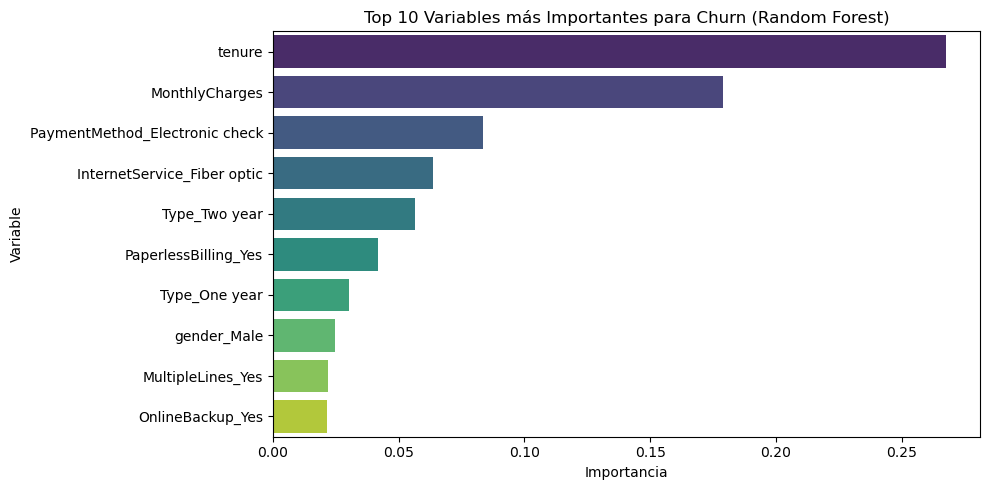

In [43]:
# Importancia de variables con Random Forest (datos balanceados)
importances = rf.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame ordenado por importancia
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Mostrar las 10 variables más importantes
print(feat_imp_df.head(10))

# Visualización
plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feat_imp_df.head(10), palette='viridis')
plt.title('Top 10 Variables más Importantes para Churn (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

## Paso 6 Evaluación y mejora del modelo

### Comparar desempeño entre modelos.

El modelo de Gradient Boosting con datos balanceados presenta un buen equilibrio entre precisión, recall y f1-score para la clase de clientes que cancelan. Esto es importante, ya que el objetivo es identificar correctamente a los usuarios que probablemente se irán para poder ofrecerles promociones y retenerlos.

El recall para clientes que cancelan es aceptable (0.73), lo que significa que el modelo detecta una buena parte de los clientes que realmente se van.

El f1-score (0.66) indica un balance razonable entre precisión y recall, ayudando a minimizar falsos positivos y falsos negativos.

Además, la accuracy general (0.80) muestra un buen desempeño del modelo en todo el conjunto de datos.

Por estas razones, el Gradient Boosting con datos balanceados es la mejor opción para el operador de telecomunicaciones Interconnect, ya que maximiza la detección de clientes que cancelan, manteniendo un modelo robusto y confiable.

                                  Feature  Importance
2                                  tenure    0.365063
13         PaymentMethod_Electronic check    0.223465
5             InternetService_Fiber optic    0.154637
19                          Type_Two year    0.062651
0                          MonthlyCharges    0.056408
10                   PaperlessBilling_Yes    0.042546
18                          Type_One year    0.032134
12  PaymentMethod_Credit card (automatic)    0.014707
7                       MultipleLines_Yes    0.013950
15                    StreamingMovies_Yes    0.010082


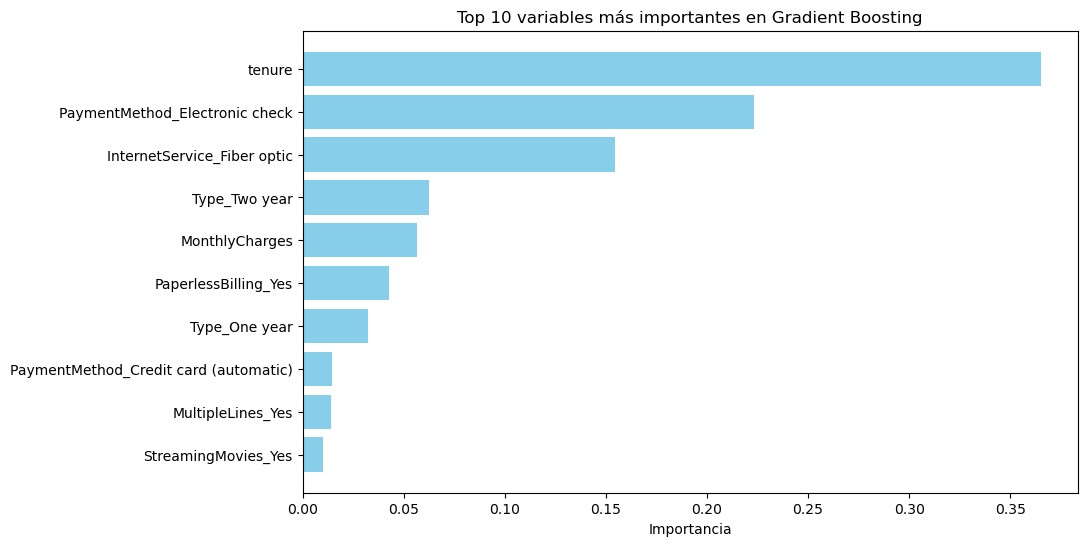

In [44]:
# Obtener la importancia de las características del modelo entrenado
importances = gb_model.feature_importances_

# Crear un DataFrame con nombres de columnas y sus importancias
feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': importances
})

# Ordenar por importancia descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las 10 variables más importantes
print(feature_importance_df.head(10))

# Visualizar la importancia
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1], color='skyblue')
plt.xlabel('Importancia')
plt.title('Top 10 variables más importantes en Gradient Boosting')
plt.show()

Conclusión:

El modelo muestra que lo más importante para predecir si un cliente cancela es cuánto tiempo lleva con la empresa (tenure). También influyen el método de pago, especialmente el pago electrónico, y el tipo de servicio de internet, como fibra óptica.

Otras cosas como el tipo de contrato y el monto mensual también ayudan, pero menos.

Con esta información, la empresa puede enfocarse en clientes nuevos, o en los que usan ciertos métodos de pago o servicios, para ofrecerles mejores ofertas y evitar que se vayan.

## Paso 7: Conclusiones y recomendaciones

## Conclusión general del proyecto

El objetivo del proyecto fue predecir qué clientes podrían cancelar su servicio para que la empresa pueda actuar a tiempo y retenerlos con ofertas especiales.

Probamos varios modelos, y el Gradient Boosting con datos balanceados fue el que mejor equilibró la precisión y la capacidad de identificar a los clientes que cancelan. Esto es importante para no perder clientes valiosos.

Además, analizamos qué factores influyen más en la cancelación. Descubrimos que el tiempo que lleva el cliente con la empresa, el método de pago y el tipo de servicio de internet son los más importantes.

También vimos que los clientes que no usan soporte técnico tienen mayor probabilidad de cancelar, y que quienes usan StreamingTV presentan una tasa más alta de cancelación.

Con estos resultados, la empresa puede enfocar sus esfuerzos en retener a los clientes en riesgo, mejorando la atención al cliente, la calidad del servicio y ofreciendo promociones personalizadas, lo que ayudará a reducir la tasa de cancelación y aumentar la satisfacción.

## Recomendaciones

Implementar el modelo de Gradient Boosting con datos balanceados para identificar clientes con alto riesgo de cancelar y así ofrecerles promociones personalizadas a tiempo.

Monitorear regularmente las variables más importantes, como el tiempo que lleva el cliente, el método de pago y el tipo de servicio, para entender mejor su comportamiento y ajustar las estrategias.

Realizar campañas específicas para clientes con mayor riesgo de churn, basadas en los factores clave detectados, para aumentar la retención.

Actualizar el modelo periódicamente con datos nuevos para mantener su precisión y adaptarse a cambios en el comportamiento de los clientes.